## Beispielfunktion: $f(x)=x^3+x^2-2x-2$, $x_0=2$

## Newton Verfahren

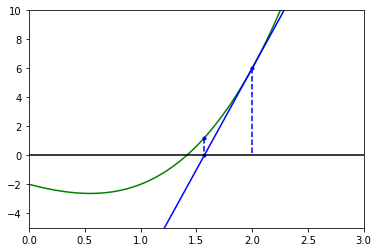

In [1]:
import math
import numpy as np              # array Funktionen
import matplotlib.pyplot as plt # plot Funktionen

x = np.arange(0, 3, 0.02) # x-Werte
f  = (lambda x: x**3+x**2-2*x-2)
df = (lambda x: 3*x**2+2*x-2)
y = f(x)               # Zugehörige y-Werte der Wertetabelle
dy= df(x)
plt.plot(x, y, 'g-')       # Plot der Wertetabelle

x0  = 2
x1  = x0-f(x0)/df(x0)
yt  = df(x0)*(x-x0)+f(x0)
plt.plot(x, yt, 'b-')      # Plot der Wertetabelle
plt.plot([x0], [f(x0)], 'b.')
plt.plot([x0, x0], [f(x0), 0], 'b--') 

plt.plot([x1], [0], 'b.')
plt.plot([x1], [f(x1)], 'b.')
plt.plot([x1, x1], [f(x1), 0], 'b--') 
#plt.plot( [0, 0], [-2, 2], 'k-') 
plt.plot([0, 3], [0,  0], 'k-') 
plt.axis([0, 3, -5, 10])
plt.show()

In [2]:
import math

i    = 0
x_i  = 2.0
here = math.inf
a  = math.sqrt(2.0) # Nullstelle
f  = lambda x: x**3+x**2-2*x-2
df = lambda x: 3*x**2+2*x-2
r  = list()
print("i=", "\tx_i=", "\t\t\tf_i=", "\t\t\tr_i=")
#while (math.fabs(f(x_i)) > 1e-6):
while (here > 1e-6):
    x_ii = x_i - f(x_i)/df(x_i)
    r.append(math.fabs((x_ii-a)/(x_i-a)) if math.fabs(x_i-a) > 1e-16 else math.inf)
    print(("%d" % (i)), ("\t%0.16f" % (x_i)), ("\t%0.16f" % (f(x_i))), ("\t%0.16f" % (r[-1])))
    last = here
    here = math.fabs(x_ii-x_i)
    x_i  = x_ii
    i   += 1
    
    if (here >= last): # (x_i) divergiert
        break

o = [math.log(r[i])/math.log(r[i-1]) if r[i-1]>0 and math.log(r[i-1])!=0.0 else 0 for i in range(1, len(r))]
print(o)

i= 	x_i= 			f_i= 			r_i=
0 	2.0000000000000000 	6.0000000000000000 	0.2683828080629080
1 	1.5714285714285714 	1.2069970845481044 	0.1021696685942485
2 	1.4302761677463349 	0.1110391140173737 	0.0121078963741982
3 	1.4144080467344540 	0.0013282205943144 	0.0001492851591336
4 	1.4142135914067240 	0.0000001982540243 	0.0000000152956839
[1.7342427192438952, 1.934969056505392, 1.9958896572691613, 2.042724798990627]


### Abbruchbedingung

Abstand der Iterierten 
$$ | x_{i+1} - x_i  | \leq \text{1e-6} $$

### Messung der Konvergenzrate

Fehler gleich Abstand zur Nullstelle: $e_i := |x_i-a|$. Vergleichen aufeinanderfolgende Fehler $e_i$, 
$e_{i} = r_{i}\cdot e_{i-1}$.

Dann *Konvergenzfaktor*, *Konvergenzrate* $r_i$: 
$$ r_{i} = \frac{e_{i}}{e_{i-1}} $$

Dann *Konvergenzordnung* $o_i$: 
$$ e_{i} = e_{i-1}^{o_i}, o_i = \frac{\log e_i}{\log e_{i-1}} $$

## Regula Falsi

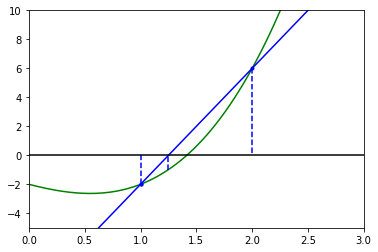

In [3]:
import math
import numpy as np              # array Funktionen
import matplotlib.pyplot as plt # plot Funktionen

x = np.arange(0, 5, 0.02) # x-Werte
f  = (lambda x: x**3+x**2-2*x-2)
df = (lambda x: 3*x**2+2*x-2)
y = f(x)        # Zugehörige y-Werte der Wertetabelle
plt.plot(x, y, 'g-')       # Plot der Wertetabelle

x0  = 1
y0  = f(x0)
x1  = 2
y1  = f(x1)
dy0 = (y1-y0)/(x1-x0)
# x0 + ()*x
yt  = y0+dy0*(x-x0)
plt.plot(x, yt, 'b-')      # Plot der Wertetabelle
plt.plot([x0], [y0], 'b.')
plt.plot([x0, x0], [y0, 0], 'b--') 

plt.plot([x0],     [y0], 'b.')
plt.plot([x1],     [y1], 'b.')
plt.plot([x1, x1], [y1, 0], 'b--') 

x01 = x0-y0/dy0
y01 = f(x01) 
plt.plot([x01, x01], [y01, 0], 'b--') 
plt.plot([0, 3], [0,  0], 'k-') 
plt.axis([0, 3, -5, 10])
plt.show()

In [13]:
import math

x_i  = 1.0
x_ii = 2.0
a  = math.sqrt(2.0) # Nullstelle
f  = lambda x: x**3+x**2-2*x-2
r  = list()
print("i=", "\tx_i=", "\t\t\tf_i=", "\t\t\tr_i=")
x_new = x_i if math.fabs(x_i-a)<math.fabs(x_ii-a) else x_ii
i = 0
#while math.fabs(f(x_new)) > 1e-6:
while math.fabs(x_ii-x_i) > 1e-6:
    assert(f(x_i)*f(x_ii) <= 0.0) # f(x_i), f(x_ii) verschiedenes Vorzeichen, also Intervall enthält Null
    df = (f(x_ii)-f(x_i))/(x_ii-x_i)
    # f(x_i)+df*(x-x_i) == 0
    here  = x_new
    x_new = x_i-f(x_i)/df
    
    #print(x_i, x_new, x_ii)
    #print(math.fabs(x_ii-x_i))
    if x_i==x_new or x_new==x_ii: # sehr nahe (kleiner als Maschinengenauigkeit) an der Nullstelle
        break
    if f(x_new)*f(x_i) > 0.0: # f(x_new), f(x_i) gleiches Vorzeichen
        x_i = x_new
    else: # f(x_new), f(x_ii) gleiches Vorzeichen oder Null!
        x_ii = x_new

    i += 1
    r.append(math.fabs(x_new-a)/math.fabs(here-a) if math.fabs(here-a) > 1e-16 else math.inf)
    print("%d" % (i), "\t%0.16f" % (x_new), "\t%0.16f" % (f(x_new)), "\t%0.16f" % (r[-1]))

o = [math.log(r[i])/math.log(r[i-1]) if r[i-1]>0 and r[i]>0 else 0 for i in range(1, len(r))]
print(o)

i= 	x_i= 			f_i= 			r_i=
1 	1.2500000000000000 	-0.9843750000000000 	0.3964466094067264
2 	1.3557046979865772 	-0.3817767444419484 	0.3562973943259637
3 	1.3942483469909324 	-0.1342492085098006 	0.3412340265274970
4 	1.4075053369184294 	-0.0455710101808982 	0.3359956467416319
5 	1.4119715122851479 	-0.0152833332594664 	0.3342240214046162
6 	1.4134655458735768 	-0.0051048431657628 	0.3336305926168072
7 	1.4139641493913886 	-0.0017027722569765 	0.3334324602026005
8 	1.4141304164702286 	-0.0005677194953799 	0.3333663801202440
9 	1.4141858461561965 	-0.0001892541399497 	0.3333443494284334
10 	1.4142043235323525 	-0.0000630863032369 	0.3333370054231968
11 	1.4142104827482056 	-0.0000210289444071 	0.3333345573676066
12 	1.4142125358302087 	-0.0000070096677653 	0.3333337413779749
13 	1.4142132201919932 	-0.0000023365581034 	0.3333334694602046
14 	1.4142134483127122 	-0.0000007788529435 	0.3333333789733092
15 	1.4142135243529657 	-0.0000002596176749 	0.3333333495560713
16 	1.4142135496997184 	

Regula Falsi konvergiert langsamer als das Newton Verfahren, insbesondere in der Nähe der Nullstelle ist die Konvergenzordnung nur noch linear. 
Ausserdem Vorsicht mit der Abbruchbedingung: Mit Funktionswert einfacher als mit Intervallbreite!